In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement as cwr
from itertools import permutations

In [76]:
from collections import defaultdict
def get_vector_multiplicity(max_n):
    """
    brute force way of getting multiplicity for the lengths of 3-vectors with 0 < length <= max_len
    """ 
    multiplicity = defaultdict(float)
    vectors = []

    for n1 in range(0, max_n+1):
        for n2 in range(0, max_n+1):
            for n3 in range(1, max_n+1):
                vec_pool = [n1,n2,n3,-n3]
                if n1 != 0:
                    vec_pool.append(-n1)
                if n2 != 0:
                    vec_pool.append(-n2)

                for vec in permutations(vec_pool, 3):
                    vectors.append(vec)

    # np.array(vectors)
    vectors = np.unique(vectors, axis=0)
    lengths = np.linalg.norm(vectors, axis=1)

    mask    = lengths <= max_n
    vectors = vectors[mask]
    lengths = lengths[mask]
    multiplicity = defaultdict(float)

    for length, count in zip(*np.unique(lengths, return_counts=True)):
        multiplicity[length] += count
    return multiplicity

In [ ]:
def deltaM_N(mL, length, multiplicity):
    return multiplicity / length * np.exp(-length*mL)


DeltaM_N at mL = 1:
max_length total value
         1        2.21
         2        5.49
         3        8.24
         4        9.40
         5       10.08
         6       10.39
         7       10.50
         8       10.56


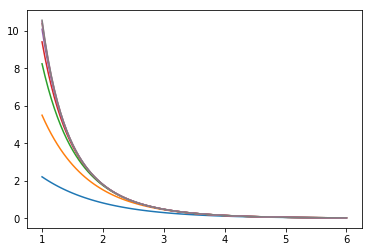

In [130]:
# find convergence of deltaM_N 

print("DeltaM_N at mL = 1:")
print("{} {}".format('max_length', 'total value'))

multiplicity = get_vector_multiplicity(9)
mL = np.linspace(1, 6, 100)

for max_n in range(1,9):
    total = np.zeros_like(mL)
    for length, mul in multiplicity.items():
        if length <= max_n:
            dMN = deltaM_N(mL, length, mul)
            total += dMN
    print("{:10} {:11.2f}".format(max_n, total[0]))
    plt.plot(mL, total)

at mL = 6, we got 0.9988 of the total value


[0, 6, 0, 1]

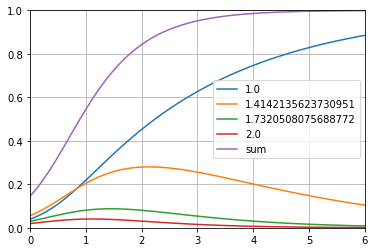

In [142]:
max_n = 5
multiplicity = get_vector_multiplicity(max_n)

mL = np.linspace(0, 6)
total = np.zeros_like(mL)
four_first = np.zeros_like(mL)

for length, mul in multiplicity.items():
    dMN = deltaM_N(mL, length, mul)
    total += dMN
    if length <= 2:
        four_first += dMN
    
for length, mul in multiplicity.items():
    dMN = deltaM_N(mL, length, mul)
    if length <= 2:
        plt.plot(mL, dMN/total, label = length)

    
plt.plot(mL, four_first/total, label='sum')
print('at mL = 6, we got {:.4f} of the total value'.format(four_first[-1]/total[-1]))
plt.xlabel('')
plt.legend()
plt.grid()
plt.axis([0,6,0,1])
    
    
    
    